<a href="https://colab.research.google.com/github/VermaSanjayrk/Hotel-booking-Analysis/blob/main/Sanjay_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROBLEM STATEMENT-**
### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Accessing the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Importing the libraries-**


In [2]:
#Importing libraries for Exploratory data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')



In [3]:
# Loading Data set of csv file
HBA=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')


**First five values of dataset of Hotel Booking analysis**

In [4]:
HBA.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Last five values of dataset of Hotel Booking Analysis**

In [5]:
HBA.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
HBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
HBA.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
len(HBA.columns)

32

In [9]:
list(HBA.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [10]:
HBA.shape

(119390, 32)

In [11]:
type(HBA)

pandas.core.frame.DataFrame

In [12]:
HBA.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
HBA['children'].fillna('unknown',inplace=True)
HBA['country'].fillna('unknown',inplace=True)
HBA['agent'].fillna('unknown',inplace=True)
HBA['company'].fillna('unknown',inplace=True)

In [14]:
HBA.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [15]:
HBA.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In [16]:
hotel_type=HBA['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [17]:
HBA.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
VGB        1
FJI        1
UMI        1
PYF        1
MDG        1
Name: country, Length: 178, dtype: int64

In [18]:
HBA.children.value_counts()

0.0        110796
1.0          4861
2.0          3652
3.0            76
unknown         4
10.0            1
Name: children, dtype: int64

In [19]:
HBA.agent.value_counts()

9.0        31961
unknown    16340
240.0      13922
1.0         7191
14.0        3640
           ...  
358.0          1
54.0           1
367.0          1
388.0          1
158.0          1
Name: agent, Length: 334, dtype: int64

# **Let's see Guests pay for a room per night**

In [20]:
data = HBA[HBA['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

## **The average price per room depends on its type and the standard deviation.**

# **How does the price vary per night over the year?**

In [21]:
data_resort = HBA[(HBA['hotel'] == 'Resort Hotel') & (HBA['is_canceled'] == 0)]
data_city = HBA[(HBA['hotel'] == 'City Hotel') & (HBA['is_canceled'] == 0)]

In [22]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [23]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [24]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


# **Now we observe here that month column is not in order, and if we visualize we will get improper conclusions.**

## **So, first we have to provide right hierarchy to month column.**

In [25]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=97a690492fdd1a34481815a3b907828d2528497622d822f2008b06d111b61209
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=1bf73f2baf66f6c74f624bd4b5084d62b8bd24235239d36a91d5d14d8e91affa
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [26]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [27]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


# **Which are the most busy months?**

In [28]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [29]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [30]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [31]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


## **Month of July And August is the most busy Months For Both city and Resort Hotels.**

# **How long do people stay at the hotels?**

In [32]:
filter = HBA['is_canceled'] == 0
data = HBA[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,unknown,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,unknown,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [34]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [35]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

## **Hence the majority of people stays for 5 nights in city hotels.**

# **Which countries have highest percentage of customers.**

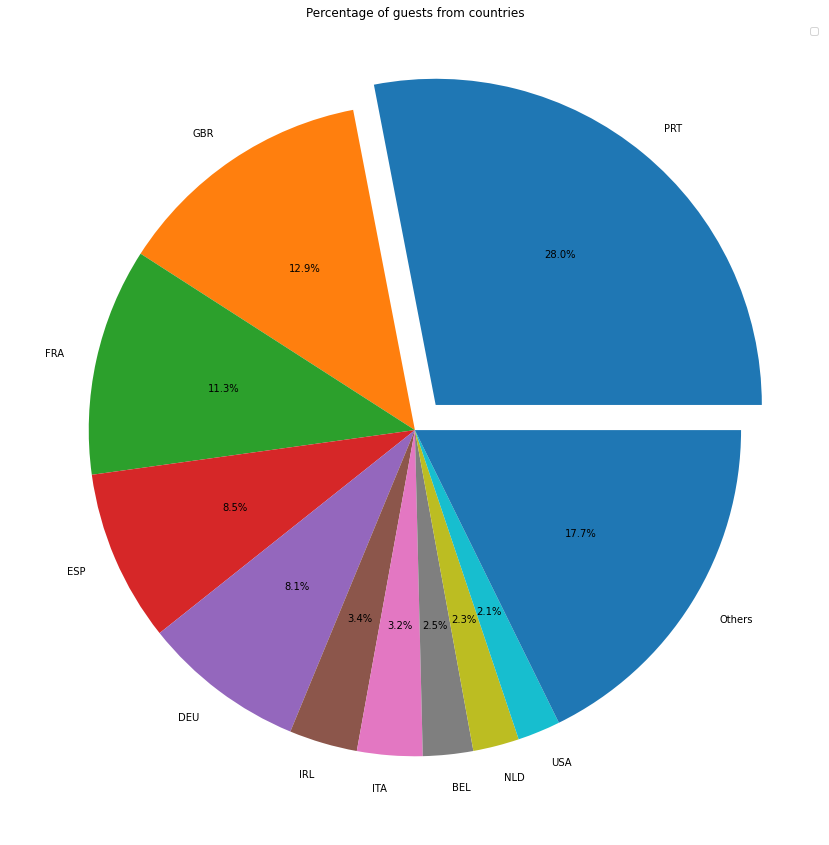

In [36]:
guests_per_country = HBA[HBA.is_canceled == 0].groupby('country').hotel.count().sort_values(ascending = False)
guests_per_country = guests_per_country.reset_index()
guests_per_country.rename(columns = {'hotel' : 'bookings'}, inplace = True)


# The top 10 countries with highest number of bookings
guests_per_country_top_10 = guests_per_country[:10].copy()

# Others countries bookings combined
new_row = pd.DataFrame(data = { 'country' : ['Others'],
                                'bookings' : [guests_per_country['bookings'][10:].sum()]
                                })

guests_per_country = pd.concat([guests_per_country_top_10, new_row])


#Pie chart Plot
fig = plt.figure(figsize =(15, 15)) 
plt.title("Percentage of guests from countries")
plt.legend(guests_per_country.index, loc="best")
plt.pie(guests_per_country.bookings , autopct='%1.1f%%', labels=guests_per_country.country , explode =(0.1,0,0,0,0,0,0,0,0,0,0));

## **Countries have highest percentage of customers is PRT and countries have lowest percentage of customers are USA,NLD,BEL.**

# **Which are the three most common and uncommon countries of origin?**

In [37]:
print('Most common countries:')
print(HBA.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(HBA.country.value_counts().tail(35))

Most common countries:
PRT    48590
GBR    12129
FRA    10415
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
UGA    2
IMN    2
GLP    2
KHM    2
ZMB    2
MMR    1
ATF    1
BFA    1
HND    1
AIA    1
MLI    1
BDI    1
BHS    1
LCA    1
NAM    1
CYM    1
DJI    1
BWA    1
NCL    1
PLW    1
ASM    1
SLE    1
NPL    1
SMR    1
GUY    1
SDN    1
NIC    1
DMA    1
KIR    1
MRT    1
VGB    1
FJI    1
UMI    1
PYF    1
MDG    1
Name: country, dtype: int64


**As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.
There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.**

# **How many days in advance are most of the bookings made.**

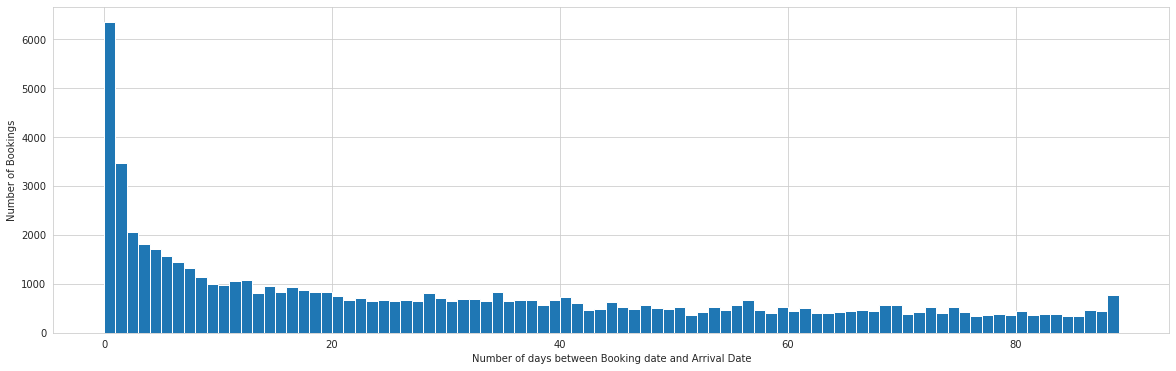

In [38]:
# df.lead_time
# Plot histogram for 90 days or 3 months of lead time

sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
plt.hist(HBA.lead_time, bins=np.arange(0, 90, 1));


plt.xlabel("Number of days between Booking date and Arrival Date")
plt.ylabel("Number of Bookings");

## **Almost Advance Bookings where done on arrivals or 2 days ago.**


# **Bookings / Cancelled Bookings by different types of customers.**

     customer_type  is_canceled  bookings
0         Contract            0      2814
1         Contract            1      1262
2            Group            0       518
3            Group            1        59
4        Transient            0     53099
5        Transient            1     36514
6  Transient-Party            0     18735
7  Transient-Party            1      6389


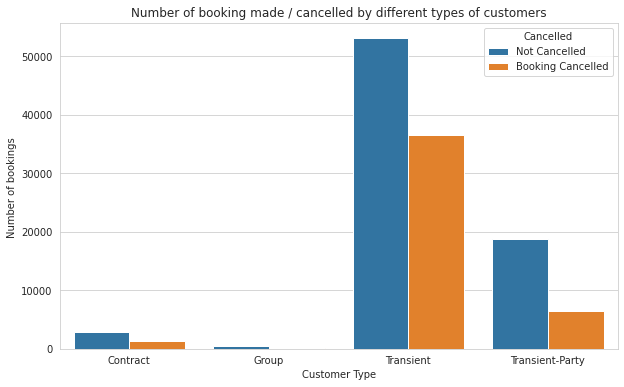

In [39]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = HBA.groupby(['customer_type','is_canceled']).count().hotel.reset_index()
customer_bookings.rename(columns = {'hotel':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

ax = sns.barplot('customer_type', 'bookings', hue='is_canceled', data=customer_bookings );

plt.title("Number of booking made / cancelled by different types of customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings ")

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Cancelled', 'Booking Cancelled'], title='Cancelled');

## **Transient and Transient-party have more Bookings / Cancelled Bookings than Contract Group.**

# **Hotel preference by Customer type.**

     customer_type         hotel  bookings
0         Contract    City Hotel      2300
1         Contract  Resort Hotel      1776
2            Group    City Hotel       293
3            Group  Resort Hotel       284
4        Transient    City Hotel     59404
5        Transient  Resort Hotel     30209
6  Transient-Party    City Hotel     17333
7  Transient-Party  Resort Hotel      7791


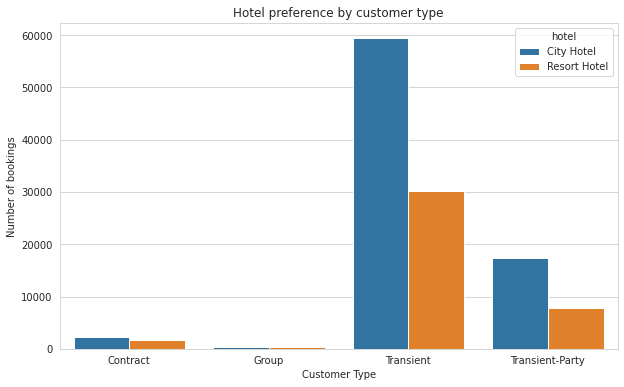

In [40]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = HBA.groupby(['customer_type','hotel']).count().lead_time.reset_index()
customer_bookings.rename(columns = {'lead_time':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

sns.barplot('customer_type', 'bookings', hue='hotel', data=customer_bookings );

plt.title("Hotel preference by customer type")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings");

## **City Hotels are more preferred by Transient Customers.**

# **Meal preference by customers**

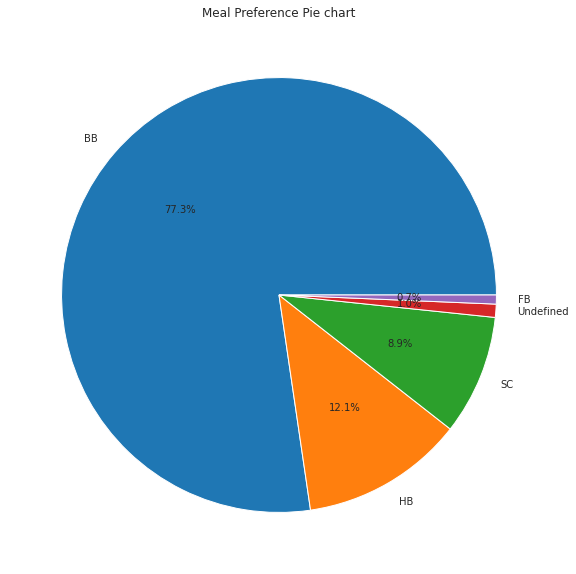

In [41]:
meal_preference = HBA.meal.value_counts()
meal_preference.index.name = "meal_type"
meal_preference = meal_preference.reset_index()
meal_preference

plt.figure(figsize = (15,10))
plt.pie(meal_preference.meal, autopct='%1.1f%%', labels=meal_preference.meal_type);

plt.title("Meal Preference Pie chart");

## **Customers prefer Breakfast Bed Meals.**

# **Meals**

In [42]:
HBA.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

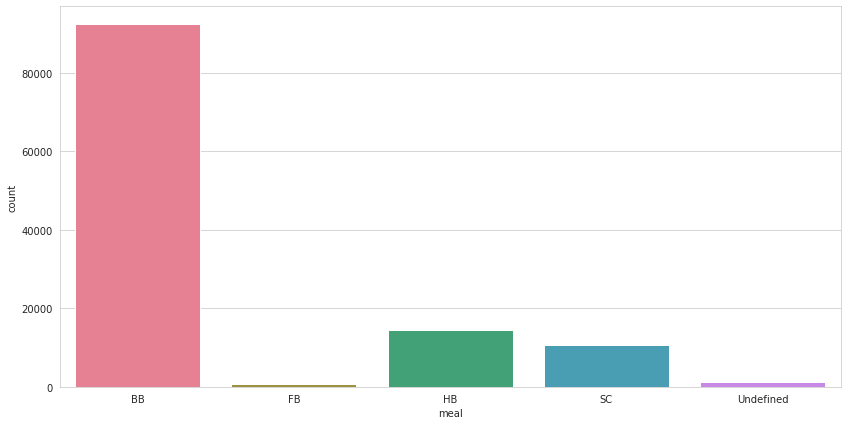

In [43]:
plt.figure(figsize=(14,7))
sns.countplot(HBA['meal'], palette='husl')
plt.show()

# **What is the most popular meal package?**

In [44]:
HBA.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

## **The Bed & Breakfast option is the most popular, with a frequency of 77.26%.**

# **Customer Type**

In [45]:
HBA.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

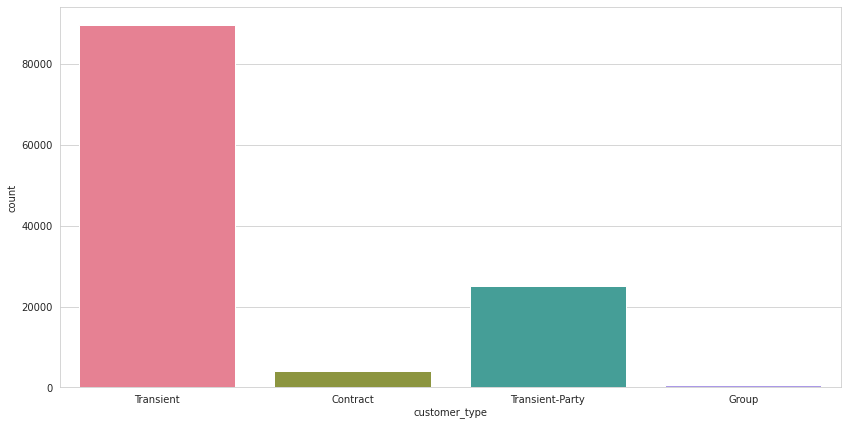

In [46]:
plt.figure(figsize=(14,7))
sns.countplot(HBA['customer_type'], palette='husl')
plt.show()

# **What is the most common customer type?**

In [47]:
HBA.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

## **Trasients are the most common customer type, they represent 75% of the total customers.**

# **Average Daily Rate (ADR)**

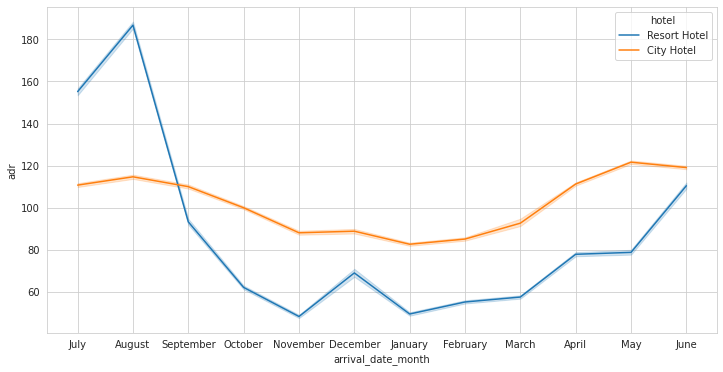

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= HBA)
plt.show()

## **From this we can see that Resort Hotel has peak point in August, December and June, city hotel have high in months of may.**

# **Which is the most reserved room type?**

In [49]:
HBA.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

## **The “A” room type is the most popular among the clients, with 71.99% of the reservations.**

# **How many bookings changes have been done during the studied period?**

In [50]:
HBA.booking_changes.sum()

26400

## **There were 25,829 registered changes in the bookings during this period.**

# **Which months have cheaper booking rates?**

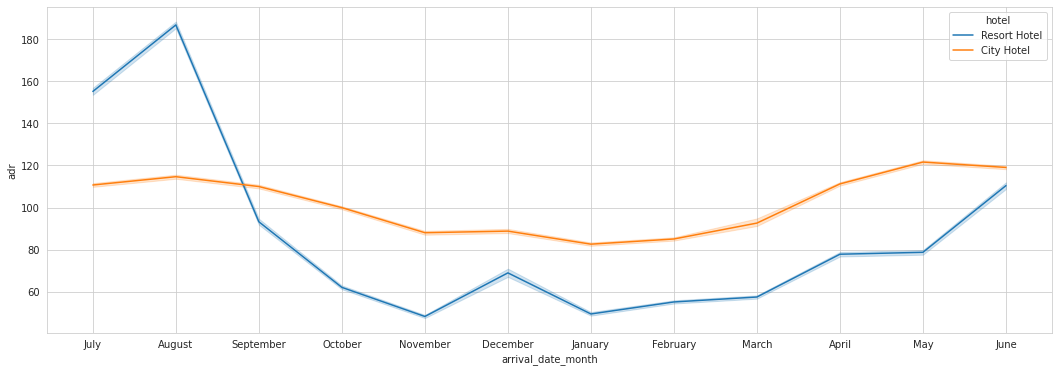

In [51]:
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= HBA)#this is a lineplot of the adr for different hotel types
plt.show()

## **For both city and resort hotels, Nov to Jan have cheaper average daily rates.**

# **Does people with children have a particular preference for the type of hotel?**

Text(0.5, 1.0, 'Number of children')

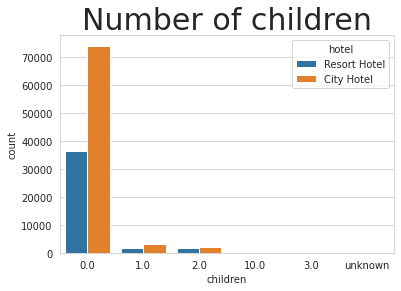

In [52]:
sns.countplot(data = HBA, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 30)

## **Families with children have no particular preference for the hotel type.**